# Práctica 4

## Ejercicio 1

## Autores : Jorge Martín Pastor y Juan Serrano Vara

## 5 dic 2018

<h1 align = "center" style="background-color:powderblue;"> Importamos las librerias</h1>

In [37]:
%reset
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import datasets, svm, metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn import linear_model
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<h1 align = "center" style="background-color:powderblue;"> Importamos los Datos</h1>

In [52]:
Presion = pd.read_csv("P1/presion.csv")
Colesterol = pd.read_csv("P1/colesterol.csv")
cateter = pd.read_csv("P1/cateter.csv")
alcohol = pd.read_csv("P1/alcohol.csv")

#### Las celdas siguientes son teoría que se ha utilizado para interpretar de manera correcta la práctica, la información se ha extraido de:

https://diferencias.eu/entre-correlacion-positiva-y-correlacion-negativa/

https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson


### Interpretación de la correlacción

El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.

Si 0 < r < 1, existe una correlación positiva.

Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.

Si -1 < r < 0, existe una correlación negativa.

Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.


##### Correlación Positiva

Se habla de una correlación positiva cuando una relación entre una variable y otra es lineal y directa, de manera que un cambio en una variable predice el cambio en la otra variable. En ese caso, se dice que la correlación es positiva perfecta, es decir, ambas variables varían al mismo tiempo. Este tipo de correlación es directamente proporcional. Hay correlación positiva cuando las dos variables se correlacionan en sentido directo. Por lo que, a valores altos de una le corresponden valores altos de la otra e igualmente con los valores bajos.

##### Correlación Negativa

Se habla de una correlación negativa cuando la relación entre una variable y otra es opuesta o inversa, es decir, cuando una variable cambia, la otra se modifica hacia lo contrario. Entonces, cuando una posee variable valores altos, la otra posee valores bajos y mientras este valor esté más cerca de -1, más evidente será esta covariación.

### Calculamos la Regresión Lineal

Y=Mx+N


Y= Será nuestra variable dependiente.

X= Será nuestra variable independiente.

M= Será la pendiente que es "Slope".

N= Será la ordenada en el origen que es "Intercept".


Por lo cual con la pendiente y la ordenada en el orginen y la variable independiente podremos predecir la variable dependiente.

<h1 style="background-color:powderblue;">EJERCICO 1</h1>

In [107]:
Presion.corr()

,Edad,Presion_sanguinea
Edad,1.000000,0.657567
Presion_sanguinea,0.657567,1.000000


La correlacción entre las dos variables es positiva, por lo cual a mas adead mas presión sanguinea tendrá el paciente y viceversa.

In [54]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Presion['Edad'],Presion['Presion_sanguinea'])

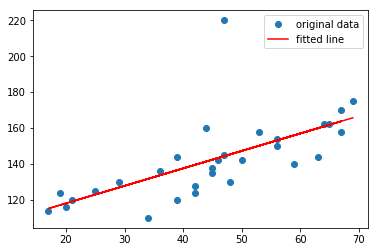

In [55]:
plt.plot(Presion['Edad'], Presion['Presion_sanguinea'], 'o', label='original data')
plt.plot(Presion['Edad'], intercept + slope*Presion['Edad'], 'r', label='fitted line')
plt.legend()
plt.show()

### Predecimos para una edad de 80 años

In [60]:
Y = slope * 80 + intercept

print("La presion sanguinea de una persona de 80 años será de",Y)

La presion sanguinea de una persona de 80 años será de 176.3843462536363


<h1 style="background-color:powderblue;">EJERCICO 2</h1>

In [92]:
Colesterol.corr()

,Peso,Colesterol
Peso,1.000000,0.265293
Colesterol,0.265293,1.000000


Estamos ante una correlación positiva moderada ya que algunos puntos están cerca de la línea, pero otros puntos están lejos de ella, lo que indica que solo existe una relación lineal moderada entre las variables.

In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Colesterol['Peso'],Colesterol['Colesterol'])

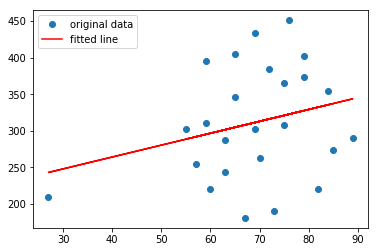

In [94]:
plt.plot(Colesterol['Peso'], Colesterol['Colesterol'], 'o', label='original data')
plt.plot(Colesterol['Peso'], intercept + slope*Colesterol['Peso'], 'r', label='fitted line')
plt.legend()
plt.show()

### Predecimos para una peso de 120 kg

In [97]:
Y = slope * 120 + intercept

print("El colesterol de una persona con 80 kg de peso será de",Y)

El colesterol de una persona con 80 kg de peso será de 393.9786286090589


<h1 style="background-color:powderblue;">EJERCICO 3</h1>

In [99]:
alcohol.corr()

,Edad,Consumo_alcohol
Edad,1.000000,0.440296
Consumo_alcohol,0.440296,1.000000


Estamos ante una correlación positiva moderada ya que algunos puntos están cerca de la línea, pero otros puntos están lejos de ella, lo que indica que solo existe una relación lineal moderada entre las variables.

In [110]:
slope, intercept, r_value, p_value, std_err = stats.linregress(alcohol['Edad'],alcohol['Consumo_alcohol'])

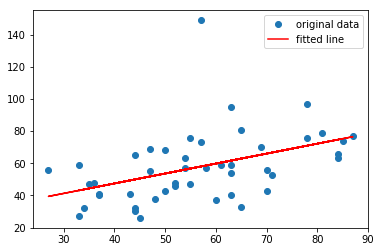

In [111]:
plt.plot(alcohol['Edad'], alcohol['Consumo_alcohol'], 'o', label='original data')
plt.plot(alcohol['Edad'], intercept + slope*alcohol['Edad'], 'r', label='fitted line')
plt.legend()
plt.show()

### Predecimos para una edad de 72 años

In [112]:
Y = slope * 72 + intercept

print("El consumo de alcohol en una persona de 72 años será de",Y)

El consumo de alcohol en una persona de 72 años será de 67.24345227426808


<h1 style="background-color:powderblue;">EJERCICO 4</h1>

In [102]:
cateter.corr()

,Altura,Long_cateter
Altura,1.000000,0.630386
Long_cateter,0.630386,1.000000


In [106]:
len(cateter)

12

Nos da una correlacción bastante alta, pero no sacamos ninguna conclusión ya que el número de pacientes es muy excaso. Solo tenemos 12.

In [103]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cateter['Altura'],cateter['Long_cateter'])

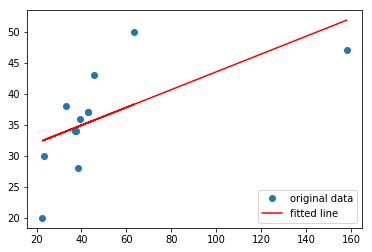

In [104]:
plt.plot(cateter['Altura'], cateter['Long_cateter'], 'o', label='original data')
plt.plot(cateter['Altura'], intercept + slope*cateter['Altura'], 'r', label='fitted line')
plt.legend()
plt.show()

Como podemos comprobar la población del DataSet que tenemos no es lo suficientemente grande como poder establecer conclusiones satisfactorias. Para un correcto análisis deberíamos tener mas datos.

<h1 style="background-color:powderblue;">EJERCICO 5</h1>

### Explica como funcionaria el sistema creado con los parametros descritos arriba.

El sistema predecirá bien el alchol, la presion y el colesterol pero tendría mucha probabilidad de fallo al predecir la longuitud del cateter. Una solución a esto sería recolectar mas datos de personas con cateter o directamente quitar esa variable ya que actualmente no nos dice nada. 

<h1 align = "center" style="background-color:powderblue;">Bibliografía</h1>

http://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html